In [1]:
# Merger Rate calculations for IMRIPY systems assuming that the DM halos are intact in the merging process.




import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
import matplotlib.colors as colors
from matplotlib import rcParams
from scipy.interpolate import InterpolatedUnivariateSpline
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})




π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
t = 13.78e9               #in units of yrs corresponding to t_0=13.78Gyr
yr = 3.154e7              # in units of seconds
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
σ_eq = 0.005
ρ_m  = 4e19                #ρ_m=4e19 M☉ Gpc^-3


t_m = 13.78e9             #in units of yr 




m_1 = 7       #in units of M☉
m_2 = 9      #in units of M☉



y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(11)

for i in range(len(y_list)):
    y_list[i] = (y_1 + (i*dy))
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))
    M_2_list[i] = (np.ceil(np.exp(y)))
    

            
m_1_list = [int(M_1) for M_1 in M_1_list]
m_2_list = [int(M_2) for M_2 in M_2_list]

    
Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy) 

    
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)


m_min = 5     #in units of M☉
m_max = 100   # in units of M☉

X_min = 1e-5
X_max = 1e5

m_1 = [7, 10, 12, 15, 20, 25, 32, 41, 53, 68, 87] M☉

Δ_1 = [ 1.76383421  2.26778684  2.91572593  3.74879049  4.81987348  6.19698019
  7.96754596 10.24398767 13.17084129 16.9339388  21.77220702]


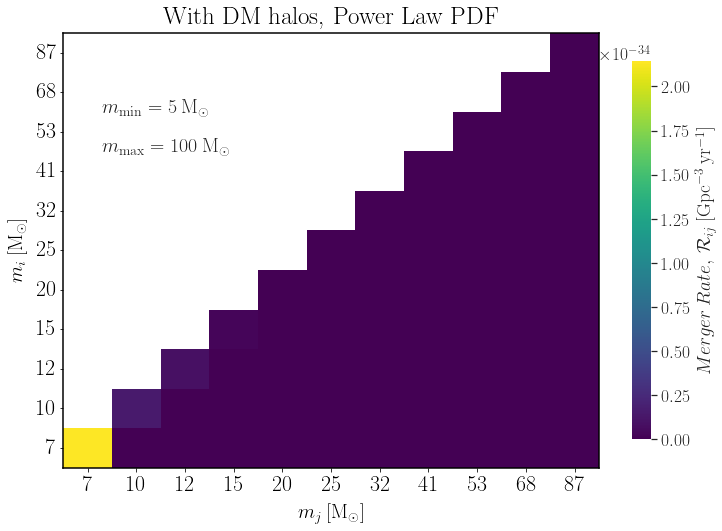

In [2]:
# Calculation of the 2D merger rate for Powerlaw PBH mass distribution. 
#The resolution of the PBHs masses m_1 is Δ_1 and of m_2 is Δ_2.



def merger_IMRIPY(m_1, m_2, Δ_1, Δ_2, t_m, DM_halos_presence):
    
    if m_1 < 5 or m_2 < 5:
        return 0
    
    elif m_1 < m_2:
        return 0
    
    else:
        beta = 0.75
        gamma  =  0.65
        delta = -0.89
        a_i_ref =  file['arr_0']   # in units of pc
        m1_ref = 1      # in units of solar mass.
        m2_ref = 1e-3   # in units of solar mass.

        def f_(m):
            return f*P(m)

        def f_b(m_1,m_2):
            return  f_(m_1)+f_(m_2)

        def λ(m_1, m_2, Δ_1, Δ_2, X): # λ_0
            return  X/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))

        def PDF(m):
            return (P(m)/m)


        I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                             # 0 to infinity.

        n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

        def x̄(m_1,m_2,Δ_1,Δ_2):
            return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))
    
    
        def a_initial(m_1, m_2, Δ_1, Δ_2, X):  # for x = x_bar 
            return (0.0977*λ(m_1,m_2,Δ_1,Δ_2, X) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))


        def C(m_1,m_2,Δ_1,Δ_2, X):
            return ((a_initial(m_1,m_2,Δ_1,Δ_2, X)/a_i_ref)**(beta)) * ((m_1/ m1_ref)**(gamma)) * ((m_2/m2_ref)**(delta))

    
        X = np.geomspace(X_min, X_max, 1000000) 
        
        
        check_value = t_m/C(m_1,m_2,Δ_1,Δ_2, X)
        
        

        if np.all(check_value) < np.min(tm_ref_list):
            
            check_value = np.min(tm_ref_list)
            m = 0.465
            b = 33.34
            
            def j_i(m_1,m_2,Δ_1,Δ_2, X):
                return (((10**(-b))/C(m_1,m_2,Δ_1,Δ_2, X))**(1/m)) * (check_value**(1/m))
            
            def j_i_prime(m_1,m_2,Δ_1,Δ_2, X):
                return (1/m) * (((10**(-b))/C(m_1,m_2,Δ_1,Δ_2, X))**(1/m)) * (check_value**(-(m-1)/m))
            
        else:   
            check_value = check_value
            
            g =  InterpolatedUnivariateSpline(tm_ref_list, ji_ref_list, ext = 2, k= 2) # j_i = g(t_m)
            g_prime = g.derivative()

                                
            def j_i(m_1,m_2,Δ_1,Δ_2, X):
                return  g(check_value)

            def j_i_prime(m_1,m_2,Δ_1,Δ_2, X):
                return (1/C(m_1,m_2,Δ_1,Δ_2, X)) * g_prime(check_value) 

        
        if DM_halos_presence == 'False':
            
                # Merger rate of  PBH binaries without halos for PBHs mass range of 5 M☉-100 M☉ .
            def D(m_1, m_2, Δ_1, Δ_2, X):
                return ( 1 + 0.0443 * λ(m_1, m_2, Δ_1, Δ_2, X))/ np.sqrt(1 + 0.1709 * λ(m_1, m_2, Δ_1, Δ_2, X))

            
            def j_X(m_1, m_2, Δ_1, Δ_2, X):
                return 0.4108 * np.sqrt(f**2 + 1.1994 * (σ_eq**2)) * D(m_1, m_2, Δ_1, Δ_2, X) * (X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2)))

            
            def γ_X(m_1,m_2,Δ_1,Δ_2, X):    
                 return j_i(m_1,m_2,Δ_1,Δ_2, X)/ j_X(m_1, m_2, Δ_1, Δ_2, X)

            
            def integrand(m_1,m_2,Δ_1,Δ_2, X):
                return j_i_prime(m_1,m_2,Δ_1,Δ_2, X) * (1/j_i(m_1,m_2,Δ_1,Δ_2, X)) * ((γ_X(m_1,m_2,Δ_1,Δ_2, X)**2)/ ((1 + (γ_X(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2))) * np.exp(- X * ((4*π)/3) * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T)

            return  (ρ_m/2) * (((f**2)* (m_1 + m_2))/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))) * np.minimum((P(m_1)*Δ_1)/m_1, (P(m_2)*Δ_2)/m_2) * ((P(m_1)*Δ_1)/m_1 + (P(m_2)*Δ_2)/m_2) *   (np.trapz(integrand(m_1,m_2,Δ_1,Δ_2, X),X))
        
        else:  
            def s(m_1, m_2, Δ_1, Δ_2, X): # S_dec of the binary decouple.
                return ((0.03095*λ(m_1, m_2, Δ_1, Δ_2, X)+ 0.3425)*λ(m_1, m_2, Δ_1, Δ_2, X))

            def t(m_1, m_2, Δ_1, Δ_2, X):  #t_dec of the binary decouple.
                return ((np.sqrt(3/(8*π*G*ρ_eq)))*(((2/3)*(s(m_1, m_2, Δ_1, Δ_2, X)-2)*np.sqrt(s(m_1, m_2, Δ_1, Δ_2, X)+1))+(4/3)))


            def ρ_bar(m):
                return ((ρ_eq/2)*(t_eq**(3/2))*((2*G*m)**(3/4))) 

            def M_halo(m, m_1, m_2, Δ_1, Δ_2, X):
                return (((16*π)/3)*ρ_bar(m)*((2 * G * m *(t(m_1, m_2, Δ_1, Δ_2, X)**2))**(1/4)))
 
            def M(m, m_1, m_2, Δ_1, Δ_2, X):
                return (m + M_halo(m, m_1, m_2, Δ_1, Δ_2, X))
   
            def M_binary_initial(m_1, m_2, Δ_1, Δ_2, X):
                return (m_1 + m_2 + M_halo(m_1, m_1, m_2, Δ_1, Δ_2, X) + M_halo(m_2, m_1, m_2, Δ_1, Δ_2, X))

                # Merger rate of  PBH binaries without halos for PBHs mass range of 5 M☉-100 M☉ .
            def D_halo(m_1, m_2, Δ_1, Δ_2, X):
                return ( 1 + 0.0857 * λ(m_1, m_2, Δ_1, Δ_2, X))/ np.sqrt(1 + 0.0583 * λ(m_1, m_2, Δ_1, Δ_2, X))

            
            def j_X_halo(m_1, m_2, Δ_1, Δ_2, X):
                return 0.4087 * np.sqrt(f**2 + 0.2998 * (σ_eq**2)) * D_halo(m_1, m_2, Δ_1, Δ_2, X) * np.sqrt((m_1 + m_2)/ M_binary_initial(m_1, m_2, Δ_1, Δ_2, X)) * (X/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2)))

            
            def γ_X_halo(m_1,m_2,Δ_1,Δ_2, X):    
                return j_i(m_1,m_2,Δ_1,Δ_2, X)/ j_X_halo(m_1, m_2, Δ_1, Δ_2, X)

            
            def integrand_halo(m_1,m_2,Δ_1,Δ_2, X):
                return j_i_prime(m_1,m_2,Δ_1,Δ_2, X) * (1/j_i(m_1,m_2,Δ_1,Δ_2, X)) * ((γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2)/ ((1 + (γ_X_halo(m_1,m_2,Δ_1,Δ_2, X)**2))**(3/2))) * np.exp(- X * ((4*π)/3) * (x̄(m_1,m_2,Δ_1,Δ_2)**3) * n_T)

            return  (ρ_m/2) * (((f**2)* (m_1 + m_2))/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))) * np.minimum((P(m_1)*Δ_1)/m_1, (P(m_2)*Δ_2)/m_2) * ((P(m_1)*Δ_1)/m_1 + (P(m_2)*Δ_2)/m_2) *   (np.trapz(integrand_halo(m_1,m_2,Δ_1,Δ_2, X),X))       



file = np.load('tm_ofj0_PWRhalo_1.npz')
a_i_ref =  file['arr_0']
ji_ref_list = file['arr_1']
tm_ref_list = file['arr_2']




DM_halos_presence = 'True'
Merger_imripy_PWR_1 = np.zeros((11, 11))



for i in range(11):
    for j in range(11):
        
        f_pbh = 7.94e-4
        f = 0.85 * f_pbh
        
          
        def P(m): #Powerlaw PBH mass distribution
            α = 1.6
            M = 5     #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_min = 100 M☉ .
            return ((α-1)/M) * ((m/M)**(-α))

        if i==j:
            Merger_imripy_PWR_1[i,j] = 0.5 * merger_IMRIPY(m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halos_presence)
            
        else:
            Merger_imripy_PWR_1[i,j] = merger_IMRIPY( m_1_list[i], m_2_list[j], Δ_1_list[i], Δ_2_list[j], t_m, DM_halos_presence)   
    
        

        
        
np.save("Merger_imripy_PWR_1", Merger_imripy_PWR_1)

mask = np.tril(np.ones((11,11)), k = -1)  #created an array of shape Merger_12 with all the elements in it being 0.
fig,ax = plt.subplots(figsize=(12, 8))  




sns.set(font_scale = 1.6)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.direction'] = 'out'
plt.rcParams['ytick.direction'] = 'out'



#  norm=LogNorm()


ax = sns.heatmap(Merger_imripy_PWR_1, mask = mask,  cmap = 'viridis', cbar = True,   
                 cbar_kws = { "shrink": 0.87, 'label': '$Merger \: Rate, \: \mathcal{R}_{ij} \: [\mathrm{Gpc}^{-3} \, \mathrm{yr}^{-1}]$'},
                  vmin = 0)




ax.set_xticklabels(m_1_list, fontsize = 10)
ax.set_yticklabels(m_2_list, rotation = 360, fontsize = 10)
ax.tick_params(left = True,  bottom = True)

ax.text(0.8, 9, "$m_\mathrm{{min}} = 5 \: \mathrm{M_{\odot}}$", size = 20)
ax.text(0.8, 8, "$m_\mathrm{{max}} = 100 \: \mathrm{M_{\odot}}$", size = 20)



# make frame visible
for _, spine in ax.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1.5)
    
    
ax.invert_yaxis()
plt.xticks(fontsize = 22)
plt.yticks(fontsize = 22)
plt.xlabel('$m_{j}\:[\mathrm{M_{\odot}}]$', fontsize = 20, labelpad = 9)     # m_j = m_2
plt.ylabel('$m_{i}\: [\mathrm{M_{\odot}}]$', fontsize = 20, labelpad = 9)    # m_i = m_1  and m_2 < equal to m_1.
plt.title('With DM halos, Power Law PDF', fontsize = 25, pad = 9)
plt.show()     

In [2]:
m_1 = m_1_list[-1]
m_2 = m_2_list[0]
Δ_1 = Δ_1_list[-1]
Δ_2 = Δ_1_list[0]
X = X_min 

file = np.load('tm_ofj0_PWRhalo_1.npz')
a_i_ref =  file['arr_0']

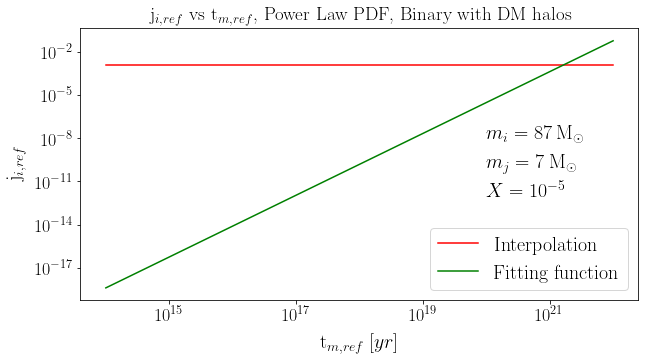

In [10]:
# check of the j_i values using fitting and Interpolation function. 

def ji_fitting_function(m_1,m_2,Δ_1,Δ_2, X, tm_ref):
    m = 0.465
    b = 33.34
    beta = 0.75
    gamma  =  0.65
    delta = -0.89
    a_i_ref =  file['arr_0']   # in units of pc
    m1_ref = 1      # in units of solar mass.
    m2_ref = 1e-3   # in units of solar mass.

    def f_(m):
        return f*P(m)

    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)

    def λ(m_1, m_2, Δ_1, Δ_2, X): # λ_0
        return  X/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))

    def PDF(m):
        return (P(m)/m)


    I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                         # 0 to infinity.

    n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))


    def a_initial(m_1, m_2, Δ_1, Δ_2, X):  # for x = x_bar 
        return (0.0977*λ(m_1,m_2,Δ_1,Δ_2, X) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))


    def C(m_1,m_2,Δ_1,Δ_2, X):
        return ((a_initial(m_1,m_2,Δ_1,Δ_2, X)/a_i_ref)**(beta)) * ((m_1/ m1_ref)**(gamma)) * ((m_2/m2_ref)**(delta))

    
    return (((10**(-b))/C(m_1,m_2,Δ_1,Δ_2, X))**(1/m)) * (tm_ref**(1/m))
            

        

        
        
        
def ji_interpolation(m_1,m_2,Δ_1,Δ_2, X, tm_ref):  
    beta = 0.75
    gamma  =  0.65
    delta = -0.89
    a_i_ref =  file['arr_0']   # in units of pc
    m1_ref = 1      # in units of solar mass.
    m2_ref = 1e-3   # in units of solar mass.

    def f_(m):
        return f*P(m)

    def f_b(m_1,m_2):
        return  f_(m_1) + f_(m_2)
    
 

    def λ(m_1, m_2, Δ_1, Δ_2, X): # λ_0
        return  X/(f_b(m_1, m_2) * np.sqrt(Δ_1 * Δ_2))

    def PDF(m):
        return (P(m)/m)


    I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                     # 0 to infinity.

    n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))


    def a_initial(m_1, m_2, Δ_1, Δ_2, X):  # for x = x_bar 
        return (0.0977*λ(m_1,m_2,Δ_1,Δ_2, X) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))


    def C(m_1,m_2,Δ_1,Δ_2, X):
        return ((a_initial(m_1,m_2,Δ_1,Δ_2, X)/a_i_ref)**(beta)) * ((m_1/ m1_ref)**(gamma)) * ((m_2/m2_ref)**(delta))


    check_value = t_m/C(m_1,m_2,Δ_1,Δ_2, X)
    
    g =  InterpolatedUnivariateSpline(tm_ref_list, ji_ref_list, ext = 2, k= 2) # j_i = g(t_m)
    
    return  g(check_value)

    


    
    
file = np.load('tm_ofj0_PWRhalo_1.npz')
ji_ref_list = file['arr_1']
tm_ref_list = file['arr_2']



tm_ref_list = (np.geomspace(1e14, 1e22, 30)).tolist()
ji_fittingfunction_list = np.zeros(len(tm_ref_list))
ji_interpolation_list = np.zeros(len(tm_ref_list))


for i, tm_ref in enumerate(tm_ref_list):
    f_pbh = 7.94e-4
    f = 0.85 * f_pbh
    def P(m): #Powerlaw PBH mass distribution
        α = 1.6
        M = 5     #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_min = 100 M☉ .
        return ((α-1)/M) * ((m/M)**(-α))

    ji_fittingfunction_list[i] = ji_fitting_function(m_1,m_2,Δ_1,Δ_2, X, tm_ref)
    ji_interpolation_list[i] = ji_interpolation(m_1,m_2,Δ_1,Δ_2, X, tm_ref)

    
    
    
plt.figure(figsize = (10, 5))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.loglog(tm_ref_list, ji_interpolation_list, 'r' )
plt.loglog(tm_ref_list, ji_fittingfunction_list, 'g' )

plt.text(1e20, 1e-8, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 20)
plt.text(1e20, 1e-10, "$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 20)
plt.text(1e20, 1e-12, "$X = 10^{-5} $", size = 20)


plt.legend(["Interpolation", "Fitting function"], loc = 'lower right', fontsize = 20)
plt.xlabel('t$_{m,ref}$$\: [yr]$', fontsize = 20, labelpad = 9)
plt.ylabel('j$_{i,ref}$', fontsize = 20, labelpad = 9)
plt.title('j$_{i,ref}$ vs t$_{m,ref}$, Power Law PDF, Binary with DM halos', fontsize = 19, pad = 9)
plt.savefig('ji_refvstm_ref.pdf', bbox_inches = 'tight')
plt.show()

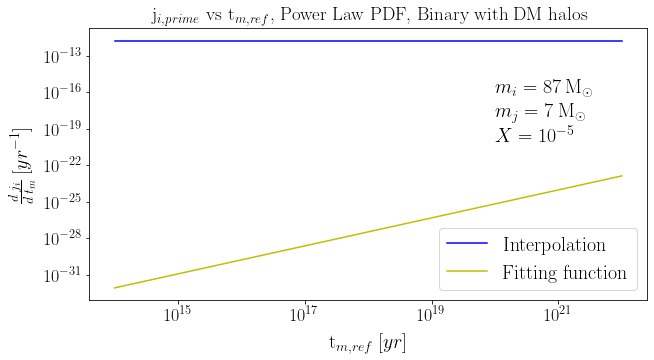

In [8]:
# check of the j_i_prime = (d j_i/ d t_m) values using fitting and Interpolation function. 

def ji_prime_fitting_function(m_1,m_2,Δ_1,Δ_2, X,tm_ref):
    m = 0.465
    b = 33.34
    beta = 0.75
    gamma  =  0.65
    delta = -0.89
    a_i_ref =  file['arr_0']   # in units of pc
    m1_ref = 1      # in units of solar mass.
    m2_ref = 1e-3   # in units of solar mass.

    def f_(m):
        return f*P(m)

    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)

    def λ(m_1, m_2, Δ_1, Δ_2, X): # λ_0
        return  X/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))

    def PDF(m):
        return (P(m)/m)


    I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                         # 0 to infinity.

    n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))


    def a_initial(m_1, m_2, Δ_1, Δ_2, X):  # for x = x_bar 
        return (0.0977*λ(m_1,m_2,Δ_1,Δ_2, X) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))


    def C(m_1,m_2,Δ_1,Δ_2, X):
        return ((a_initial(m_1,m_2,Δ_1,Δ_2, X)/a_i_ref)**(beta)) * ((m_1/ m1_ref)**(gamma)) * ((m_2/m2_ref)**(delta))


    return (1/m) * (((10**(-b))/C(m_1,m_2,Δ_1,Δ_2, X))**(1/m)) * (tm_ref**(-(m-1)/m))
               


    
    
    
def ji_prime_interpolation(m_1,m_2,Δ_1,Δ_2, X, tm_ref):  
    beta = 0.75
    gamma  =  0.65
    delta = -0.89
    a_i_ref =  file['arr_0']   # in units of pc
    m1_ref = 1      # in units of solar mass.
    m2_ref = 1e-3   # in units of solar mass.

    def f_(m):
        return f*P(m)

    def f_b(m_1,m_2):
        return  f_(m_1) + f_(m_2)
    
    def λ(m_1, m_2, Δ_1, Δ_2, X): # λ_0
        return  X/(f_b(m_1, m_2) * np.sqrt(Δ_1 * Δ_2))

    def PDF(m):
        return (P(m)/m)


    I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                     # 0 to infinity.

    n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))


    def a_initial(m_1, m_2, Δ_1, Δ_2, X):  # for x = x_bar 
        return (0.0977*λ(m_1,m_2,Δ_1,Δ_2, X) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))


    def C(m_1,m_2,Δ_1,Δ_2, X):
        return ((a_initial(m_1,m_2,Δ_1,Δ_2, X)/a_i_ref)**(beta)) * ((m_1/ m1_ref)**(gamma)) * ((m_2/m2_ref)**(delta))


    check_value = t_m/C(m_1,m_2,Δ_1,Δ_2, X)
    
    g =  InterpolatedUnivariateSpline(tm_ref_list, ji_ref_list, ext = 2, k= 2) # j_i = g(t_m)
    
    g_prime = g.derivative()
    
    return (1/C(m_1,m_2,Δ_1,Δ_2, X)) * g_prime(check_value) 



    

    
    
tm_ref_list = (np.geomspace(1e14, 1e22, 30)).tolist()
ji_prime_interpolation_list = np.zeros(len(tm_ref_list))
ji_prime_fittingfunction_list = np.zeros(len(tm_ref_list))

for i, tm_ref in enumerate(tm_ref_list):
    f_pbh = 7.94e-4
    f = 0.85 * f_pbh
    def P(m): #Powerlaw PBH mass distribution
        α = 1.6
        M = 5     #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_min = 100 M☉ .
        return ((α-1)/M) * ((m/M)**(-α))

    ji_prime_fittingfunction_list[i] = ji_prime_fitting_function(m_1,m_2,Δ_1,Δ_2, X, tm_ref)
    ji_prime_interpolation_list[i] = ji_prime_interpolation(m_1,m_2,Δ_1,Δ_2, X, tm_ref)

    
    
plt.figure(figsize = (10, 5))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.loglog(tm_ref_list, ji_prime_interpolation_list, 'b' )
plt.loglog(tm_ref_list, ji_prime_fittingfunction_list, 'y' )

plt.text(1e20, 1e-16, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 20)
plt.text(1e20, 1e-18, "$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 20)
plt.text(1e20, 1e-20, "$X = 10^{-5} $", size = 20)


plt.legend(["Interpolation", "Fitting function"], loc = 'lower right', fontsize = 20)
plt.xlabel('t$_{m,ref}$$\: [yr]$', fontsize = 20, labelpad = 9)
plt.ylabel(r'$\frac{d\, j_{i}}{d \,t_{m}} \: [yr^{-1}]$', fontsize = 20, labelpad = 9)
plt.title('j$_{i, prime}$ vs t$_{m,ref}$, Power Law PDF, Binary with DM halos', fontsize = 19, pad = 9)
plt.savefig('ji_ref_primevstm_ref_prime.pdf', bbox_inches = 'tight')
plt.show()